##**Data Analytics: Advanced Methods**


# Preparation:

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Import the following files:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv    
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


##**Data Preparation: Combining Red and White Wine Data**
The `red wine` and `white wine` datasets were combined by appending the rows of one dataset to the other.
The resulting merged dataset was stored as a single data frame named `wine_data_all`, which contains all observations from both the red and white wine data.
All subsequent analyses and questions are based on this combined dataset.


In [ ]:
import pandas as pd

#Load files as per the names
white_wine_url= "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_wine = pd.read_csv(white_wine_url, sep= ";")

red_wine_url="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red_wine = pd.read_csv(red_wine_url, sep=";")

#Check files head to make sure they are correct
red_wine.head()
white_wine.head()

#Join wine data together by column.
wine_data_all=pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

wine_data_all.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##**Check Data Types:**
Check the data types of the attributes.

In [ ]:
print("\n Data types of each column:\n")

print(wine_data_all.dtypes)


 Data types of each column:

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


##**Are there any missing values in the dataset? How many?**

The dataset `wine_data_all` was checked for missing values without printing the entire data frame. The analysis identifies whether any missing or null entries exist and provides a count of missing values per column, allowing for assessment of data completeness before further analysis.


In [ ]:
print("Missing Values in each column:\n")
print(wine_data_all.isnull().sum())

Missing Values in each column:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


##**Correlation Between Attributes (Excluding Quality)**

The correlation among all attributes in `wine_data_all`, excluding the Quality column, was calculated to examine the strength and direction of linear relationships between the variables. This helps identify which features are strongly positively or negatively correlated, providing insights into patterns and potential multicollinearity in the dataset before modeling or further analysis.

In [ ]:
data_without_quality=wine_data_all.drop('quality', axis=1)
data_corr= data_without_quality.corr()
data_corr
#free sulphur and total sulphur dioxide have the correlation of 0.720934
#residual sugar and density have the correlation of 0.552517

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


##**Frequency Distribution of Wine Quality**

A plot was created to show how many wines fall into each `Quality` category, giving a clear overview of the distribution in `wine_data_all`.


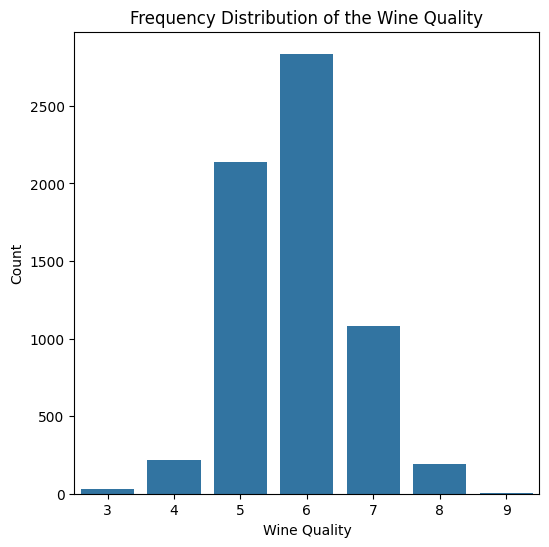

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.countplot(x='quality', data=wine_data_all)
plt.title('Frequency Distribution of the Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

#The graph below shows that most wines are of average quality(falling between 5-6)


##**Exploring the Impact of Chemical Attributes on Wine Quality**

**Question**:  How do different chemical components in wine influence its quality? Are some chemicals more impactful than others?

**Reason for Choosing This Question**: The dataset includes detailed measurements of chemical properties such as alcohol, acidity, sugars, and sulfates. While alcohol’s influence on taste and fermentation is well known, the effect of other chemicals on quality is less obvious. Analyzing these relationships helps identify which chemicals most strongly affect wine quality, providing evidence-based insights into wine composition.

Correlation of each chemical with wine quality: 

alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


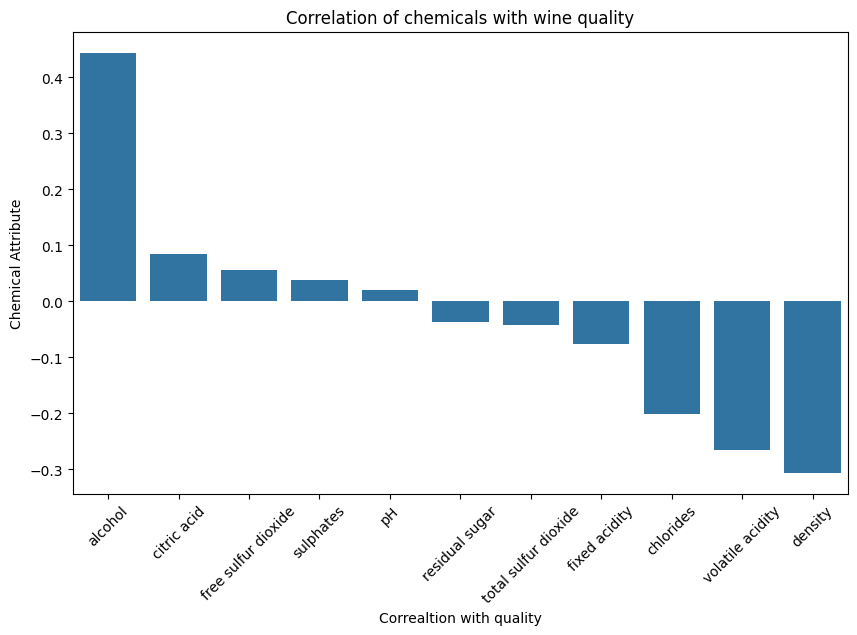


 Top 3 chemicals that are positively correlated with wine quality: 
 alcohol                0.444319
citric acid            0.085532
free sulfur dioxide    0.055463
Name: quality, dtype: float64

 Top 3 chemicals that are negatively correlated with wine quality: 
 alcohol                0.444319
citric acid            0.085532
free sulfur dioxide    0.055463
Name: quality, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation for all attributes
correlation_matrix = wine_data_all.corr()

#Correlation of chemicals with quality
quality_corr = correlation_matrix['quality'].drop('quality')
quality_corr_sorted = quality_corr.sort_values(ascending=False)

print("Correlation of each chemical with wine quality: \n")
print(quality_corr_sorted)

#Visualize the results
plt.figure(figsize=(10,6))
sns.barplot(x=quality_corr_sorted.index, y= quality_corr_sorted.values)
plt.xticks(rotation=45)
plt.title("Correlation of chemicals with wine quality")
plt.xlabel("Correaltion with quality")
plt.ylabel("Chemical Attribute")
plt.show()

#top positive and top negative correaltion
top_positive= quality_corr_sorted.head(3)
top_negative= quality_corr_sorted.head(3)

print("\n Top 3 chemicals that are positively correlated with wine quality: \n", top_positive)
print("\n Top 3 chemicals that are negatively correlated with wine quality: \n", top_negative)

##**Recoding Wine Quality into Three Levels**

The Quality attribute in wine_data_all was transformed into three levels to simplify analysis:

Low (0): original ratings 3 and 4

Medium (1): original ratings 5 and 6

High (2): original ratings 7, 8, and 9

In [ ]:
def reduce_levels(num):
  if num in [3, 4]:
    return 'Low'
  elif num in [5, 6]:
    return 'Medium'
  else:
    return 'High'

wine_data_all['quality_label']= wine_data_all['quality'].apply(reduce_levels)

#result can be seen here
wine_data_all[['quality', 'quality_label']].head(10)

,quality,quality_label
0,5,Medium
1,5,Medium
2,5,Medium
3,6,Medium
4,5,Medium
5,5,Medium
6,5,Medium
7,7,High
8,7,High
9,5,Medium


##**Normalization of Numeric Attributes**

All numeric attributes in `wine_data_all` were **normalized** using min-max scaling:

$$
x_{norm} = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

This scales each feature to a **range between 0 and 1**, ensuring that all attributes contribute equally to analyses and models.


In [ ]:
#check types of attributes
wine_data_all.dtypes

#we can drop columns like quality and quality_labels
normal_cols = wine_data_all.drop(['quality', 'quality_label'], axis=1)

normal_cols.head()

wine_data_all[normal_cols.columns]=(normal_cols - normal_cols.min())/ (normal_cols.max()- normal_cols.min())

##**Splitting the Dataset**

The dataset was divided into **training and test sets** to train the models and evaluate their performance on unseen data.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = wine_data_all.drop(['quality', 'quality_label'], axis=1)
y = wine_data_all['quality_label']

scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

##**Predicting Wine Quality with Logistic Regression**

The **Logistic Regression** algorithm was applied to predict wine quality based on its chemical attributes, modeling the relationship between the features and the wine’s quality levels.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Initialize the Logistic Regression Model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

#predict wine quality
y_pred= log_reg.predict(X_test)

#evaluate
test_accuracy= accuracy_score(y_test, y_pred)
print("Test Accurary:" , test_accuracy)



Test Accurary: 0.7892307692307692


##**Predicting Wine Quality with K-Nearest Neighbors (KNN)**

The **K-Nearest Neighbors (KNN)** algorithm was applied to predict wine quality based on its chemical attributes, classifying each wine sample according to the quality of its nearest neighbors in the feature space.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Use KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predict test
y_pred_test = knn.predict(X_test)

#Test Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_test)
print("KNN TEST ACCURACY: ", knn_accuracy)


KNN TEST ACCURACY:  0.7907692307692308


##**Displaying Confusion Matrices for Model Performance**

Confusion matrices were generated for both Logistic Regression and K-Nearest Neighbors (KNN) models to evaluate their performance. These matrices summarize how many instances from each wine quality level were correctly classified versus misclassified, providing a clear visualization of each model’s predictive accuracy across all classes.

In [ ]:
from sklearn.metrics import confusion_matrix

#CONFUSION MATRICES FOR LOGISTIC REGRESSION
cm_log = confusion_matrix(y_test, y_pred)
print("Confusion Matrix – Logistic Regression:\n")
print(cm_log)

#CONFUSION MATRICES FOR KNN
cm_knn = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix- KNN:\n")
print(cm_knn)

Confusion Matrix – Logistic Regression:

[[ 104    0  261]
 [   3    0   75]
 [  71    1 1435]]

Confusion Matrix- KNN:

[[ 183    0  182]
 [   5    9   64]
 [ 144   13 1350]]


##**Evaluating Model Performance**
Evaluate the models’ performances by computing Accuracy, Precision, and Recall.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#REGRESSION LOGISTIC EVALUATION
accuracy_log = accuracy_score(y_test, y_pred)

precision_log= precision_score(y_test, y_pred, average='macro')

recall_log = recall_score(y_test, y_pred, average= 'macro')

print("\nLogistic Regression Performance:\n")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")

#KNN EVALUATION
accuracy_KNN = accuracy_score(y_test, y_pred_test)

precision_KNN= precision_score(y_test, y_pred_test, average='macro')

recall_KNN = recall_score(y_test, y_pred_test, average= 'macro')

print("\nKNN Performance:\n")
print(f"Accuracy: {accuracy_KNN:.4f}")
print(f"Precision: {precision_KNN:.4f}")
print(f"Recall: {recall_KNN:.4f}")


Logistic Regression Performance:

Accuracy: 0.7892
Precision: 0.4648
Recall: 0.4124

KNN Performance:

Accuracy: 0.7908
Precision: 0.6021
Recall: 0.5042


For the logistic Regression Performance: the model predicts the wine quality 78.92% of the time accurately, 46.48% of all wines belongs to correct quality class, and of all wines model identified the 41.24% correctly.
We can notice that precision level and recall level are lower, therefore, the model struggles to correctly identify the wine as per wine class.


For the KNN, The accuracy is 79.1%(higher than the regression logistic), precision for KNN = 0.6021=60.21% implies that KNN predicts the class better than the Regression Logistic.
Recall for KNN= 0.5042= 50.42%, KNN identifies the all wine class 50.4% correctly(better than regression logistic)

Conclusion: we can say that KNN gives better precision and recall than the Regression Logistic, even though their accuray level is very close.